# Multiple Linear Regression


##### Giovanni Paz-Silva

#### Fuel Consumption Analysis Review

#### Objectives

*   Use Scikit-learn to Implement multiple linear regression
*   Create, train, and test a multiple linear regression model using Fuel Consumption Dataset
*   Explain every step with clarity and educationally

#### Import needed packages

##### For this lab, we will need to have the following packages

* NumPy
* Matplotlib
* Pandas
* Scikit-learn

In [3]:
import pandas as pd
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

print("Libraries Installed")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Libraries Installed


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split

print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)


Numpy Version:  2.0.2
Pandas Version:  2.2.3


### Data Loaded

##### The url of the dataset used in this lab is provided by the IBM Data Science Course

In [5]:
fuel_consumption_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [7]:
df = pd.read_csv(fuel_consumption_url)
# Exploration of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.sample(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
722,2014,MERCEDES-BENZ,C 250,COMPACT,1.8,4,AS7,Z,10.9,7.5,9.4,30,216
133,2014,BMW,X6 xDRIVE35i,SUV - STANDARD,3.0,6,A8,Z,13.6,9.8,11.9,24,274
492,2014,HONDA,CR-V,SUV - SMALL,2.4,4,A5,X,10.3,7.6,9.1,31,209
1055,2014,VOLKSWAGEN,TOUAREG TDI CLEAN DIESEL,SUV - STANDARD,3.0,6,AS8,D,12.3,8.0,10.4,27,281
14,2014,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
755,2014,MERCEDES-BENZ,G 63 AMG,SUV - STANDARD,5.5,8,AS7,Z,19.4,15.7,17.7,16,407
606,2014,KIA,FORTE 5,FULL-SIZE,1.6,4,M6,X,11.1,8.2,9.8,29,225
45,2014,AUDI,R8,TWO-SEATER,4.2,8,M6,Z,21.2,13.4,17.7,16,407
825,2014,MITSUBISHI,MIRAGE,COMPACT,1.2,3,M5,X,7.0,5.6,6.4,44,147
464,2014,GMC,TERRAIN,SUV - SMALL,3.6,6,A6,X,13.9,9.6,12.0,24,276


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


##### The first section of the model is created to review the IBM DS course lab work of predicting the CO2 emissions by excluding some features. In the second section I will include the remaining features to improve the accuracy of the model.

### Data Cleanning
##### Since All the models are from the same year, and the features "MAKE","MODEL", "VEHICLECLASS", "TRANSMISSION", and "FUELTYPE" are not numerical values, the first part will consist on s model analysis just with the features with numerical values.

In [11]:
# Dropping the non-numerical features and Year
df = df.drop(columns=["MAKE", "MODEL", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE","MODELYEAR"])

##### Now that we have the dataset with only numerical values, we can take a look at the relationship between the features and the target variable, which is "CO2EMISSIONS". We can use a scatter plot to visualize this relationship.

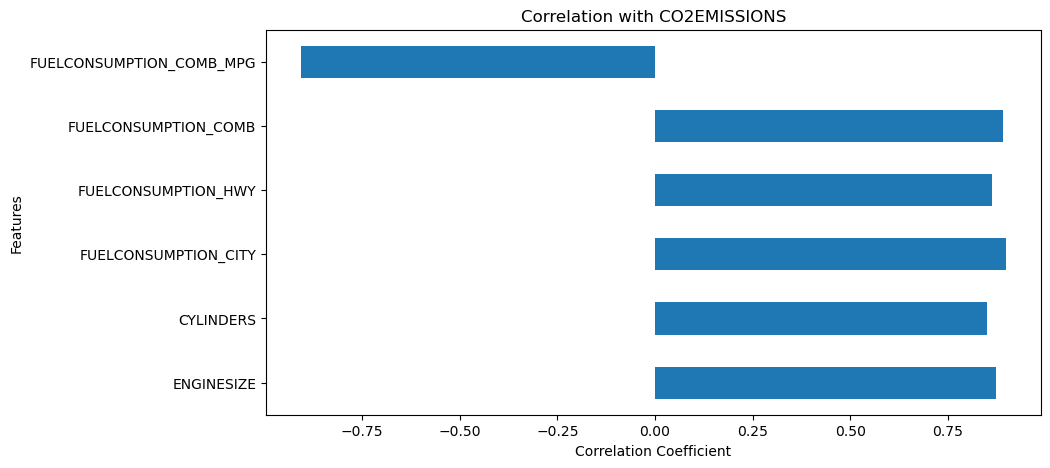

In [14]:
correlation_values = df.corr()["CO2EMISSIONS"].drop("CO2EMISSIONS")
correlation_values.plot(kind="barh", figsize=(10, 5), title="Correlation with CO2EMISSIONS")
correlation_values.transpose()
plt.ylabel("Features")
plt.xlabel("Correlation Coefficient")
plt.show()